In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD',parse_dates=['Test Date'])

In [3]:
df=df.groupby(['County','Test Date']).sum()

# Westchester County

FOR RED ZONE STATUS

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average  

In [4]:
westchester=pd.DataFrame(df.loc['Westchester'])
westchester['New Positives/Total Tests']=westchester['New Positives']/westchester['Total Number of Tests Performed']
westchester['pos_hundred_thousand']=(westchester['New Positives']*100000)/967506
westchester.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,771,68702,8701,1405557,0.088611,79.689428
2020-12-30,959,69661,12987,1418544,0.073843,99.120832
2020-12-31,953,70614,12185,1430729,0.078211,98.500681
2021-01-01,1013,71627,12775,1443504,0.079295,104.702193
2021-01-02,591,72218,8333,1451837,0.070923,61.084892
2021-01-03,544,72762,7180,1459017,0.075766,56.227041
2021-01-04,619,73381,8878,1467895,0.069723,63.978931
2021-01-05,776,74157,10826,1478721,0.071679,80.206221
2021-01-06,1019,75176,13201,1491922,0.077191,105.322344


In [5]:
westchester['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.075534
2021-01-03    0.075758
2021-01-04    0.076625
2021-01-05    0.074206
2021-01-06    0.074684
2021-01-07    0.074090
2021-01-08    0.072450
2021-01-09    0.071672
2021-01-10    0.070927
2021-01-11    0.072221
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

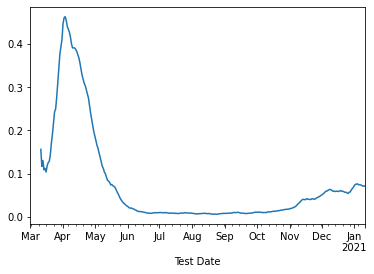

In [6]:
westchester['New Positives/Total Tests'].rolling(7).mean().plot()

In [7]:
westchester['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    79.453180
2021-01-03    79.349822
2021-01-04    80.472000
2021-01-05    80.545828
2021-01-06    81.431758
2021-01-07    80.841138
2021-01-08    78.478657
2021-01-09    81.402227
2021-01-10    85.226493
2021-01-11    88.962165
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

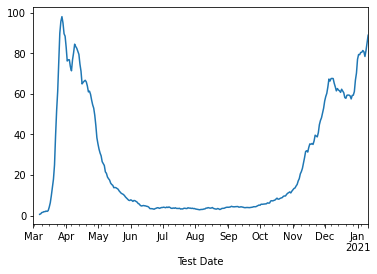

In [8]:
westchester['pos_hundred_thousand'].rolling(7).mean().plot()

In [9]:
per_cap=np.sum(westchester['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(westchester['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >=.4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate<=.2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# Ulster County

FOR POSSIBLE RED ZONE STATUS

Geographic area has 7-day rolling average positivity above 5% for 10 days  

AND  

Geographic area has 12 or more new daily cases per 100,000 residents on 7-day average  

In [10]:
ulster=df.loc['Ulster']
ulster['New Positives/Total Tests']=ulster['New Positives']/ulster['Total Number of Tests Performed']
ulster['pos_hundred_thousand']=(ulster['New Positives']*100000)/177573
ulster.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,74,5572,919,200239,0.080522,41.673002
2020-12-30,107,5679,1352,201591,0.079142,60.256908
2020-12-31,137,5816,1639,203230,0.083588,77.151369
2021-01-01,119,5935,1685,204915,0.070623,67.014693
2021-01-02,84,6019,1111,206026,0.075608,47.304489
2021-01-03,70,6089,847,206873,0.082645,39.420407
2021-01-04,97,6186,1011,207884,0.095945,54.625422
2021-01-05,118,6304,1431,209315,0.082460,66.451544
2021-01-06,113,6417,1801,211116,0.062743,63.635800


In [11]:
ulster['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.073555
2021-01-03    0.076113
2021-01-04    0.081153
2021-01-05    0.081430
2021-01-06    0.079087
2021-01-07    0.077487
2021-01-08    0.077738
2021-01-09    0.077947
2021-01-10    0.075692
2021-01-11    0.073304
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

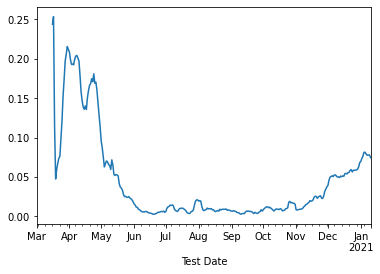

In [12]:
ulster['New Positives/Total Tests'].rolling(7).mean().plot()

In [13]:
ulster['pos_hundred_thousand'].rolling(7).mean().tail(12)

Test Date
2020-12-31    46.258641
2021-01-01    48.833035
2021-01-02    51.407429
2021-01-03    52.533727
2021-01-04    55.349470
2021-01-05    58.889262
2021-01-06    59.371961
2021-01-07    59.613310
2021-01-08    59.693760
2021-01-09    65.647046
2021-01-10    67.416942
2021-01-11    68.543239
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

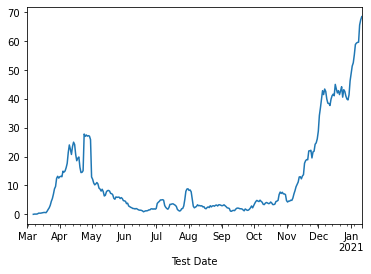

In [14]:
ulster['pos_hundred_thousand'].rolling(7).mean().plot()

In [15]:
per_cap=np.sum(ulster['pos_hundred_thousand'].rolling(7).mean().tail(12).values >10)
pos_rate=np.sum(ulster['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 12 and pos_rate >= .5:
    print('LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS')
if (per_cap>=1) and (pos_rate>=.3 and pos_rate<.5):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .3):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS


# DUTCHESS COUNTY

Geographic area has 7-day rolling average positivity above 5% for 10 days  

AND  

Geographic area has 12 or more new daily cases per 100,000 residents on 7-day average  

In [16]:
dutchess=df.loc['Dutchess']
dutchess['New Positives/Total Tests']=dutchess['New Positives']/dutchess['Total Number of Tests Performed']
dutchess['pos_hundred_thousand']=(dutchess['New Positives']*100000)/294218
dutchess.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,149,11869,2005,361787,0.074314,50.642721
2020-12-30,213,12082,2655,364442,0.080226,72.395299
2020-12-31,297,12379,3338,367780,0.088975,100.945557
2021-01-01,222,12601,2900,370680,0.076552,75.454255
2021-01-02,196,12797,2116,372796,0.092628,66.617270
2021-01-03,223,13020,2253,375049,0.098979,75.794139
2021-01-04,170,13190,1854,376903,0.091694,57.780285
2021-01-05,189,13379,2499,379402,0.075630,64.238082
2021-01-06,263,13642,3462,382864,0.075968,89.389500


In [17]:
dutchess['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.081172
2021-01-03    0.080873
2021-01-04    0.086195
2021-01-05    0.086383
2021-01-06    0.085775
2021-01-07    0.084606
2021-01-08    0.086448
2021-01-09    0.084137
2021-01-10    0.084979
2021-01-11    0.084813
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

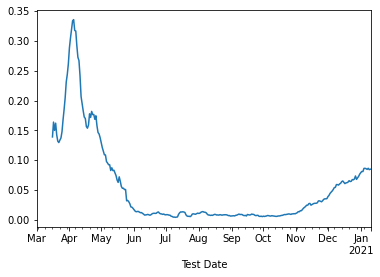

In [18]:
dutchess['New Positives/Total Tests'].rolling(7).mean().plot()

In [19]:
dutchess['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    66.520160
2021-01-03    69.142123
2021-01-04    71.375647
2021-01-05    73.317841
2021-01-06    75.745584
2021-01-07    74.968706
2021-01-08    78.221882
2021-01-09    81.280838
2021-01-10    84.339795
2021-01-11    87.738635
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

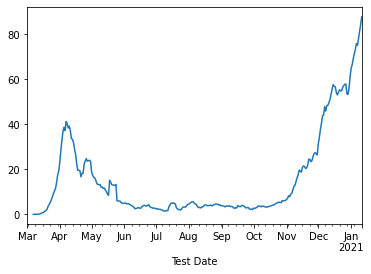

In [20]:
dutchess['pos_hundred_thousand'].rolling(7).mean().plot()

In [21]:
per_cap=np.sum(dutchess['pos_hundred_thousand'].rolling(7).mean().tail(12).values >10)
pos_rate=np.sum(dutchess['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 12 and pos_rate >= .5:
    print('LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS')
if (per_cap>=1) and (pos_rate>=.3 and pos_rate<.5):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .3):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS


# MONROE COUNTY

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [22]:
monroe=df.loc['Monroe']
monroe['New Positives/Total Tests']=monroe['New Positives']/monroe['Total Number of Tests Performed']
monroe['pos_hundred_thousand']=(monroe['New Positives']*100000)/741770
monroe.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,602,33059,5463,926604,0.110196,81.157232
2020-12-30,695,33754,6516,933120,0.106661,93.694811
2020-12-31,838,34592,9702,942822,0.086374,112.973024
2021-01-01,622,35214,6520,949342,0.095399,83.853486
2021-01-02,564,35778,5220,954562,0.108046,76.034350
2021-01-03,480,36258,4971,959533,0.096560,64.710085
2021-01-04,447,36705,4766,964299,0.093789,60.261267
2021-01-05,625,37330,5880,970179,0.106293,84.257924
2021-01-06,723,38053,7782,977961,0.092907,97.469566


In [23]:
monroe['New Positives/Total Tests'].rolling(7).mean().tail(14)

Test Date
2020-12-29    0.090357
2020-12-30    0.093947
2020-12-31    0.097165
2021-01-01    0.100704
2021-01-02    0.103837
2021-01-03    0.099459
2021-01-04    0.099575
2021-01-05    0.099017
2021-01-06    0.097052
2021-01-07    0.098454
2021-01-08    0.096488
2021-01-09    0.093380
2021-01-10    0.089854
2021-01-11    0.087403
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

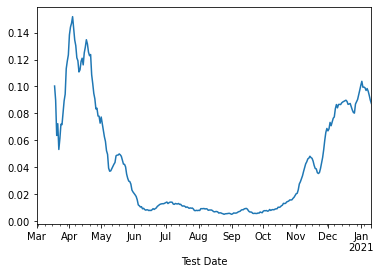

In [24]:
monroe['New Positives/Total Tests'].rolling(7).mean().plot()

In [25]:
monroe['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    83.179422
2021-01-03    82.023885
2021-01-04    81.812036
2021-01-05    82.254992
2021-01-06    82.794243
2021-01-07    81.985367
2021-01-08    83.603119
2021-01-09    86.954177
2021-01-10    85.413461
2021-01-11    85.740863
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

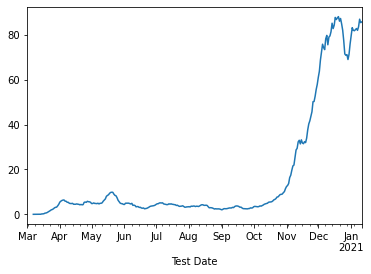

In [26]:
monroe['pos_hundred_thousand'].rolling(7).mean().plot()

In [27]:
per_cap=np.sum(monroe['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(monroe['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# Manhattan 

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [28]:
manhattan=df.loc['New York']
manhattan['New Positives/Total Tests']=manhattan['New Positives']/manhattan['Total Number of Tests Performed']
manhattan['pos_hundred_thousand']=(manhattan['New Positives']*100000)/1628706
manhattan.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,589,61794,14412,2595203,0.040869,36.163678
2020-12-30,768,62562,21751,2616954,0.035309,47.153998
2020-12-31,736,63298,22258,2639212,0.033067,45.189248
2021-01-01,744,64042,19366,2658578,0.038418,45.680436
2021-01-02,416,64458,10376,2668954,0.040093,25.541749
2021-01-03,441,64899,11236,2680190,0.039249,27.076710
2021-01-04,645,65544,13666,2693856,0.047197,39.601991
2021-01-05,826,66370,17028,2710884,0.048508,50.715108
2021-01-06,906,67276,23741,2734625,0.038162,55.626982


In [29]:
manhattan['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.037516
2021-01-03    0.037663
2021-01-04    0.039172
2021-01-05    0.040263
2021-01-06    0.040671
2021-01-07    0.041291
2021-01-08    0.040178
2021-01-09    0.038886
2021-01-10    0.038588
2021-01-11    0.038485
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

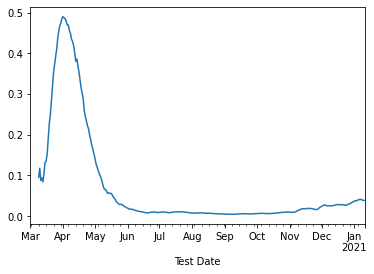

In [30]:
manhattan['New Positives/Total Tests'].rolling(7).mean().plot()

In [31]:
manhattan['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    36.847832
2021-01-03    37.303935
2021-01-04    38.058259
2021-01-05    40.137034
2021-01-06    41.347461
2021-01-07    43.470092
2021-01-08    44.434925
2021-01-09    48.443365
2021-01-10    51.811508
2021-01-11    53.109647
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

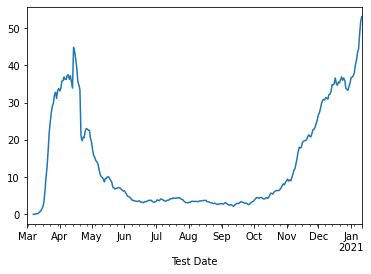

In [32]:
manhattan['pos_hundred_thousand'].rolling(7).mean().plot()

In [33]:
per_cap=np.sum(manhattan['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(manhattan['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN PENDING


# QUEENS

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [34]:
queens=df.loc['Queens']
queens['New Positives/Total Tests']=queens['New Positives']/queens['Total Number of Tests Performed']
queens['pos_hundred_thousand']=(queens['New Positives']*100000)/2253858
queens.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,1404,121781,17083,2653927,0.082187,62.293188
2020-12-30,1752,123533,22025,2675952,0.079546,77.733380
2020-12-31,1574,125107,22581,2698533,0.069705,69.835810
2021-01-01,1506,126613,22553,2721086,0.066776,66.818761
2021-01-02,1130,127743,17515,2738601,0.064516,50.136255
2021-01-03,1196,128939,15757,2754358,0.075903,53.064568
2021-01-04,1422,130361,17676,2772034,0.080448,63.091819
2021-01-05,1713,132074,22346,2794380,0.076658,76.003013
2021-01-06,1819,133893,25632,2820012,0.070966,80.706060


In [35]:
queens['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.071788
2021-01-03    0.072464
2021-01-04    0.074154
2021-01-05    0.073365
2021-01-06    0.072139
2021-01-07    0.072236
2021-01-08    0.071964
2021-01-09    0.071073
2021-01-10    0.069012
2021-01-11    0.068590
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

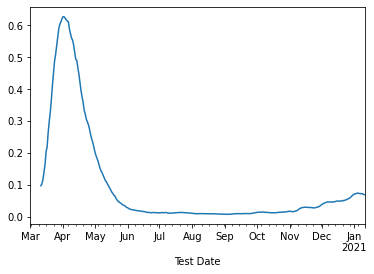

In [36]:
queens['New Positives/Total Tests'].rolling(7).mean().plot()

In [37]:
queens['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    62.762225
2021-01-03    63.275630
2021-01-04    63.281969
2021-01-05    65.240515
2021-01-06    65.665184
2021-01-07    67.319490
2021-01-08    69.436495
2021-01-09    72.092259
2021-01-10    74.253632
2021-01-11    76.839674
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

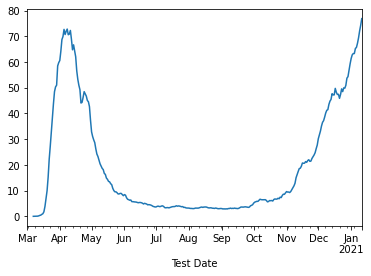

In [38]:
queens['pos_hundred_thousand'].rolling(7).mean().plot()

In [39]:
per_cap=np.sum(queens['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(queens['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# BROOKLYN

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [40]:
brooklyn=df.loc['Kings']
brooklyn['New Positives/Total Tests']=brooklyn['New Positives']/brooklyn['Total Number of Tests Performed']
brooklyn['pos_hundred_thousand']=(brooklyn['New Positives']*100000)/2559903
brooklyn.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,1456,120208,20606,3045104,0.070659,56.877155
2020-12-30,1767,121975,26297,3071401,0.067194,69.026053
2020-12-31,1449,123424,24505,3095906,0.059131,56.603707
2021-01-01,1385,124809,23897,3119803,0.057957,54.103613
2021-01-02,846,125655,16005,3135808,0.052858,33.048127
2021-01-03,1028,126683,16433,3152241,0.062557,40.157772
2021-01-04,1384,128067,19498,3171739,0.070982,54.064549
2021-01-05,1572,129639,22417,3194156,0.070125,61.408577
2021-01-06,1858,131497,27980,3222136,0.066405,72.580875


In [41]:
brooklyn['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.061870
2021-01-03    0.061087
2021-01-04    0.063048
2021-01-05    0.062972
2021-01-06    0.062859
2021-01-07    0.063680
2021-01-08    0.063155
2021-01-09    0.062471
2021-01-10    0.061747
2021-01-11    0.061295
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

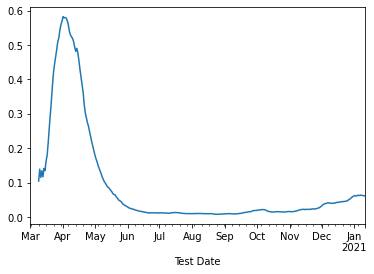

In [42]:
brooklyn['New Positives/Total Tests'].rolling(7).mean().plot()

In [43]:
brooklyn['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    51.743032
2021-01-03    51.709549
2021-01-04    51.982996
2021-01-05    52.630342
2021-01-06    53.138174
2021-01-07    55.029987
2021-01-08    56.665094
2021-01-09    60.437558
2021-01-10    62.926491
2021-01-11    64.762499
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

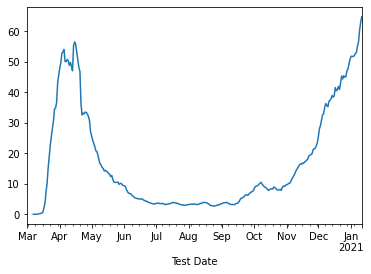

In [44]:
brooklyn['pos_hundred_thousand'].rolling(7).mean().plot()

In [45]:
per_cap=np.sum(brooklyn['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(brooklyn['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# BRONX

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [46]:
bronx=df.loc['Bronx']
bronx['New Positives/Total Tests']=bronx['New Positives']/bronx['Total Number of Tests Performed']
bronx['pos_hundred_thousand']=(bronx['New Positives']*100000)/1418207
bronx.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,778,81882,8649,1634181,0.089953,54.858000
2020-12-30,1110,82992,15473,1649654,0.071738,78.267841
2020-12-31,983,83975,12937,1662591,0.075984,69.312872
2021-01-01,1094,85069,13672,1676263,0.080018,77.139656
2021-01-02,577,85646,7217,1683480,0.079950,40.685175
2021-01-03,631,86277,7455,1690935,0.084641,44.492800
2021-01-04,796,87073,12710,1703645,0.062628,56.127209
2021-01-05,871,87944,10740,1714385,0.081099,61.415576
2021-01-06,1224,89168,14834,1729219,0.082513,86.306160


In [47]:
bronx['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.078079
2021-01-03    0.078217
2021-01-04    0.077844
2021-01-05    0.076580
2021-01-06    0.078119
2021-01-07    0.078051
2021-01-08    0.076391
2021-01-09    0.073454
2021-01-10    0.072735
2021-01-11    0.074662
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

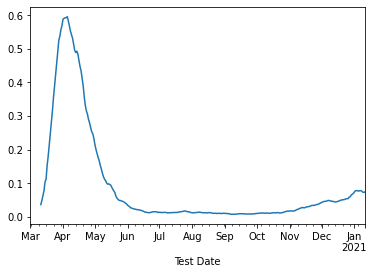

In [48]:
bronx['New Positives/Total Tests'].rolling(7).mean().plot()

In [49]:
bronx['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    59.300229
2021-01-03    59.703152
2021-01-04    60.126222
2021-01-05    61.063018
2021-01-06    62.211350
2021-01-07    64.246112
2021-01-08    63.812969
2021-01-09    67.127013
2021-01-10    70.813761
2021-01-11    73.815539
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

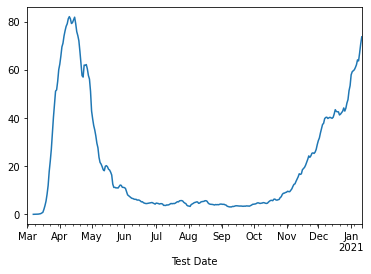

In [50]:
bronx['pos_hundred_thousand'].rolling(7).mean().plot()

In [51]:
per_cap=np.sum(bronx['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(bronx['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# STATEN ISLAND

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [52]:
richmond=df.loc['Richmond']
richmond['New Positives/Total Tests']=richmond['New Positives']/richmond['Total Number of Tests Performed']
richmond['pos_hundred_thousand']=(richmond['New Positives']*100000)/476143
richmond.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2020-12-29,483,34402,5171,707586,0.093406,101.440114
2020-12-30,596,34998,8114,715700,0.073453,125.172480
2020-12-31,551,35549,8709,724409,0.063268,115.721537
2021-01-01,499,36048,6812,731221,0.073253,104.800449
2021-01-02,371,36419,5152,736373,0.072011,77.917768
2021-01-03,430,36849,4760,741133,0.090336,90.309004
2021-01-04,616,37465,7068,748201,0.087153,129.372898
2021-01-05,641,38106,7146,755347,0.089701,134.623422
2021-01-06,580,38686,8811,764158,0.065827,121.812145


In [53]:
richmond['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-02    0.076707
2021-01-03    0.076549
2021-01-04    0.078983
2021-01-05    0.078454
2021-01-06    0.077364
2021-01-07    0.077746
2021-01-08    0.075836
2021-01-09    0.073882
2021-01-10    0.069984
2021-01-11    0.068215
Name: New Positives/Total Tests, dtype: float64

<AxesSubplot:xlabel='Test Date'>

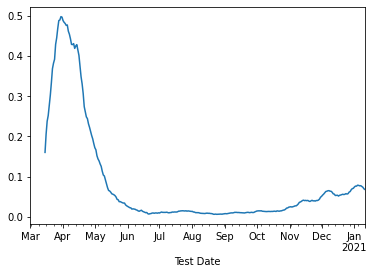

In [54]:
richmond['New Positives/Total Tests'].rolling(7).mean().plot()

In [55]:
richmond['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-02    101.860155
2021-01-03    102.940263
2021-01-04    106.390607
2021-01-05    111.131080
2021-01-06    110.651032
2021-01-07    109.060873
2021-01-08    112.721238
2021-01-09    115.661531
2021-01-10    116.471612
2021-01-11    114.911457
Name: pos_hundred_thousand, dtype: float64

<AxesSubplot:xlabel='Test Date'>

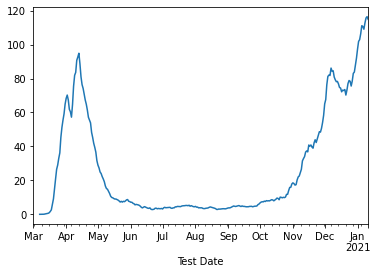

In [56]:
richmond['pos_hundred_thousand'].rolling(7).mean().plot()

In [57]:
per_cap=np.sum(richmond['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(richmond['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT
